<h1>Breast Cancer Wisconsin - Projekt</h1>

Importanje biblioteka

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, HTML

%matplotlib inline

Dohvaćanje podataka iz CSV-a

In [48]:
df = pd.read_csv("breast-cancer-wisconsin.csv")
df.head()

,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Kreiranje liste originalnih stupaca iz dataframe-a

In [49]:
original_columns = df.columns

<h2>1. Kontrola kvalitete podataka</h2>

Replaceanje znaka '?' sa *np.nan*
<br/>
Prikazivanje koliko svaki stupac ima ukupno nedostajućih vrijednosti

In [50]:
df = df.replace('?', np.nan)
df.isnull().sum()

sample_code_number              0
clump_thickness                 0
uniformity_of_cell_size         0
uniformity_of_cell_shape        0
marginal_adhesion               0
single_epithelial_cell_size     0
bare_nuclei                    16
bland_chromatin                 0
normal_nucleoli                 0
mitoses                         0
class                           0
dtype: int64

Iz rezultata je vidljivo da ukupno ima 16 nedostajućih vrijednosti i to na stupcu *bare_nuclei*

Zatim je potrebno promjeniti tip podatka za stupac *bare_nuclei* iz *object* u numerički tip kako bi se taj stupac mogao računati

In [51]:
print('Popis stupaca i tipova podataka prije:')
print(df.dtypes)

df['bare_nuclei'] = pd.to_numeric(df['bare_nuclei'], errors='coerce')

print('\nPopis stupaca i tipova podataka poslije:')
print(df.dtypes)

Popis stupaca i tipova podataka prije:
sample_code_number              int64
clump_thickness                 int64
uniformity_of_cell_size         int64
uniformity_of_cell_shape        int64
marginal_adhesion               int64
single_epithelial_cell_size     int64
bare_nuclei                    object
bland_chromatin                 int64
normal_nucleoli                 int64
mitoses                         int64
class                           int64
dtype: object

Popis stupaca i tipova podataka poslije:
sample_code_number               int64
clump_thickness                  int64
uniformity_of_cell_size          int64
uniformity_of_cell_shape         int64
marginal_adhesion                int64
single_epithelial_cell_size      int64
bare_nuclei                    float64
bland_chromatin                  int64
normal_nucleoli                  int64
mitoses                          int64
class                            int64
dtype: object


Radi bolje čitljivosti stupca *class* kroz tablice i grafikone, dodati ćemo novi stupac *tumor_type* (2-Benign tumor i 4-Malignant tumor)

In [52]:
df['tumor_type'] = 'Benign tumor'
df.loc[df['class'] == 4, 'tumor_type'] = 'Malignant tumor'
df.groupby('tumor_type').head(3)

,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,tumor_type
0,1000025,5,1,1,1,2,1.0,3,1,1,2,Benign tumor
1,1002945,5,4,4,5,7,10.0,3,2,1,2,Benign tumor
2,1015425,3,1,1,1,2,2.0,3,1,1,2,Benign tumor
5,1017122,8,10,10,8,7,10.0,9,7,1,4,Malignant tumor
12,1041801,5,3,3,3,2,3.0,4,4,1,4,Malignant tumor
14,1044572,8,7,5,10,7,9.0,5,5,4,4,Malignant tumor


Izrada ciljne varijable *ima_zlocudni_tumor*

In [53]:
df['ima_zlocudni_tumor'] = 0
df.loc[df['class'] == 4, 'ima_zlocudni_tumor'] = 1
df.groupby('ima_zlocudni_tumor').head(3)

,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,tumor_type,ima_zlocudni_tumor
0,1000025,5,1,1,1,2,1.0,3,1,1,2,Benign tumor,0
1,1002945,5,4,4,5,7,10.0,3,2,1,2,Benign tumor,0
2,1015425,3,1,1,1,2,2.0,3,1,1,2,Benign tumor,0
5,1017122,8,10,10,8,7,10.0,9,7,1,4,Malignant tumor,1
12,1041801,5,3,3,3,2,3.0,4,4,1,4,Malignant tumor,1
14,1044572,8,7,5,10,7,9.0,5,5,4,4,Malignant tumor,1


Prepoznavanje uniformnih ili nelogičnih distribucija

In [54]:
for column in original_columns:
    print(df.groupby(column)[column].count())
    print('\n')

sample_code_number
61634       1
63375       1
76389       1
95719       1
128059      1
           ..
1369821     1
1371026     1
1371920     1
8233704     1
13454352    1
Name: sample_code_number, Length: 645, dtype: int64


clump_thickness
1     145
2      50
3     108
4      80
5     130
6      34
7      23
8      46
9      14
10     69
Name: clump_thickness, dtype: int64


uniformity_of_cell_size
1     384
2      45
3      52
4      40
5      30
6      27
7      19
8      29
9       6
10     67
Name: uniformity_of_cell_size, dtype: int64


uniformity_of_cell_shape
1     353
2      59
3      56
4      44
5      34
6      30
7      30
8      28
9       7
10     58
Name: uniformity_of_cell_shape, dtype: int64


marginal_adhesion
1     407
2      58
3      58
4      33
5      23
6      22
7      13
8      25
9       5
10     55
Name: marginal_adhesion, dtype: int64


single_epithelial_cell_size
1      47
2     386
3      72
4      48
5      39
6      41
7      12
8      21
9       2
1

Jedino što nije logično je da stupac *simple_code_number* ima duplicirane brojeve, što ne bi smijeo, pošto je ID

<h2>2. Statističke analize uzroka podataka</h1>

Prikaz distribucije frekvencije u grafu za svaku kategoričku varijablu

<AxesSubplot:title={'center':'Tumor'}>

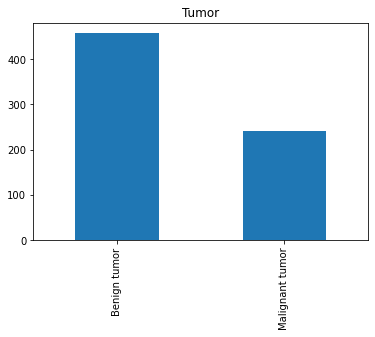

In [55]:
df['tumor_type'].value_counts().plot(kind='bar', title='Tumor', x=['f','d'])

Kreiranje liste kontinuiranih varijabli za dataframe-a, jer će se koristiti kroz projekt

In [56]:
continuous_columns = [column for column in df.columns if column != 'class' and column != 'tumor_type' and
                      column != 'ima_zlocudni_tumor']

Izračunati srednju vrijednost, z vrijednost, zaobljenost distribucije i nagnutost distribucije za svaku kontinuiranu varijablu

Izračun srednje vrijednosti za svaku kontinuiranu varijablu

In [57]:
means = []
print('Ispis srednji vrijednosti:')
for column in continuous_columns:
    means.append(df[column].mean())

pd.DataFrame.from_dict({'Varijabla': continuous_columns, "Srednja vrijednost":means})

Ispis srednji vrijednosti:


,Varijabla,Srednja vrijednost
0,sample_code_number,1.071704e+06
1,clump_thickness,4.417740e+00
2,uniformity_of_cell_size,3.134478e+00
3,uniformity_of_cell_shape,3.207439e+00
4,marginal_adhesion,2.806867e+00
5,single_epithelial_cell_size,3.216023e+00
6,bare_nuclei,3.544656e+00
7,bland_chromatin,3.437768e+00
8,normal_nucleoli,2.866953e+00
9,mitoses,1.589413e+00


Izračun z vrijednosti za svaku kontinuiranu varijablu

In [58]:
for column in continuous_columns:
    df[column + '_zvrijednost'] = (df[column] - df[column].mean())/df[column].std(ddof=0)

df.head()

,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,...,sample_code_number_zvrijednost,clump_thickness_zvrijednost,uniformity_of_cell_size_zvrijednost,uniformity_of_cell_shape_zvrijednost,marginal_adhesion_zvrijednost,single_epithelial_cell_size_zvrijednost,bare_nuclei_zvrijednost,bland_chromatin_zvrijednost,normal_nucleoli_zvrijednost,mitoses_zvrijednost
0,1000025,5,1,1,1,2,1.0,3,1,1,...,-0.116239,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.698853,-0.179662,-0.611825,-0.343912
1,1002945,5,4,4,5,7,10.0,3,2,1,...,-0.111504,0.206936,0.283845,0.266875,0.768621,1.710106,1.772867,-0.179662,-0.284112,-0.343912
2,1015425,3,1,1,1,2,2.0,3,1,1,...,-0.091265,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.424217,-0.179662,-0.611825,-0.343912
3,1016277,6,8,8,1,3,4.0,3,7,1,...,-0.089884,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.125054,-0.179662,1.354454,-0.343912
4,1017023,4,1,1,3,2,1.0,3,1,1,...,-0.088674,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.698853,-0.179662,-0.611825,-0.343912


Izračun zaobljenosti distribucije za svaku kontinurianu varijablu

In [59]:
kurtosis_list = []
for column in continuous_columns:
    kurtosis_list.append(df[column].kurtosis())

pd.DataFrame.from_dict({'Varijabla':continuous_columns, 'Zaobljenost':kurtosis_list})

,Varijabla,Zaobljenost
0,sample_code_number,257.717159
1,clump_thickness,-0.623715
2,uniformity_of_cell_size,0.098803
3,uniformity_of_cell_shape,0.007011
4,marginal_adhesion,0.987947
5,single_epithelial_cell_size,2.169066
6,bare_nuclei,-0.798844
7,bland_chromatin,0.184621
8,normal_nucleoli,0.474269
9,mitoses,12.657878


Izračun nagnutosti distribucije za svaku kontinuiranu varijablu

In [60]:
skew_list = []

for column in continuous_columns:
    skew_list.append(df[column].skew())
    
pd.DataFrame.from_dict({'Varijabla':continuous_columns, 'Nagnutost':skew_list})

,Varijabla,Nagnutost
0,sample_code_number,13.675326
1,clump_thickness,0.592859
2,uniformity_of_cell_size,1.233137
3,uniformity_of_cell_shape,1.161859
4,marginal_adhesion,1.524468
5,single_epithelial_cell_size,1.712172
6,bare_nuclei,0.990016
7,bland_chromatin,1.099969
8,normal_nucleoli,1.422261
9,mitoses,3.560658


Izračun korelacije svake varijable s ciljnom varijablom

In [61]:
columns = [column for column in df.columns if column != 'class' and column != 'tumor_type' and column != 'ima_zlocudni_tumor'
           and not column.endswith('_zvrijednost')]

correlations = []

for column in columns:
    correlation = df[column].astype(float).corr(df['ima_zlocudni_tumor'])
    correlations.append(correlation)

pd.DataFrame.from_dict({'Varijabla':columns, 'Korelacija':correlations})

,Varijabla,Korelacija
0,sample_code_number,-0.080226
1,clump_thickness,0.716001
2,uniformity_of_cell_size,0.817904
3,uniformity_of_cell_shape,0.818934
4,marginal_adhesion,0.696800
5,single_epithelial_cell_size,0.682785
6,bare_nuclei,0.822696
7,bland_chromatin,0.756616
8,normal_nucleoli,0.712244
9,mitoses,0.423170


Izračunati korelacije svake varijable izražene kroz z vrijednost i kategorizirane u razrede od -3 do 3 s ciljnom varijablom

Izračun korelacije svake varijable izražene kroz z vrijednost s ciljnom varijablom

In [62]:
columns = [column for column in df.columns if column.endswith('_zvrijednost')]
correlations = []

for column in columns:
    correlation = df[column].astype(float).corr(df['ima_zlocudni_tumor'])
    correlations.append(correlation)
    
pd.DataFrame.from_dict({'Varijabla':columns, 'Korelacija':correlations})

,Varijabla,Korelacija
0,sample_code_number_zvrijednost,-0.080226
1,clump_thickness_zvrijednost,0.716001
2,uniformity_of_cell_size_zvrijednost,0.817904
3,uniformity_of_cell_shape_zvrijednost,0.818934
4,marginal_adhesion_zvrijednost,0.696800
5,single_epithelial_cell_size_zvrijednost,0.682785
6,bare_nuclei_zvrijednost,0.822696
7,bland_chromatin_zvrijednost,0.756616
8,normal_nucleoli_zvrijednost,0.712244
9,mitoses_zvrijednost,0.423170


Izračun korelacije svake varijable izražene kroz kategorizirane u razrede od -3 do 3 s ciljnom varijablom

In [63]:
columns = [column for column in df.columns if column != 'class' and column != 'tumor_type' and column != 'ima_zlocudni_tumor'
           and not column.endswith('_zvrijednost') and not column.endswith('_razred')]

correlations = []

for column in columns:
    column_razred = '{0}_razred'.format(column)
    df[column_razred] = pd.cut(df[column], [-3,0,3])
    
    correlation = df[column_razred].cat.codes.corr(df['ima_zlocudni_tumor'])
    correlations.append(correlation)

pd.DataFrame.from_dict({'Varijabla':columns, 'Korelacija':correlations})

,Varijabla,Korelacija
0,sample_code_number,NaN
1,clump_thickness,-0.519122
2,uniformity_of_cell_size,-0.837106
3,uniformity_of_cell_shape,-0.827741
4,marginal_adhesion,-0.695684
5,single_epithelial_cell_size,-0.719999
6,bare_nuclei,-0.765241
7,bland_chromatin,-0.791610
8,normal_nucleoli,-0.702619
9,mitoses,-0.356406


<h2>IV, WoE izračuni</h2>

Izračunati IV, WoE za svaku varijablu

Prvo je potrebno kontinuirane varijable pretvoriti u kategoričke i obrisati stupce koji nisu potrebni (kontinuirani stupci)
<br/>
Stupac *sample_code_number* nije kategoriziran jer su brojevi jedinstveni kao (npr.: OIB) stoga ga nema smisla kategorizirati

In [64]:
#pošto sve kontiunirane varijable koje treba kategorizirati imaju vrijednost između 1-10, postupak za kategorizaciju je isti,
#samo se mjenja naziv stupaca, stoga ćemo kreirati listu kontinuriranih varijabli, tako da možemo iterirati po njima i tako
#napisati kod samo jednom za kategorizaciju varijable

#radimo kopiju tako da nam ostane stari dataframe i da možemo pokretati prethodne čelije, jer ćemo ovaj novi dataframe skroz
#očisti za WoE i IV

continuous_columns_for_categorizing = ['clump_thickness', 'uniformity_of_cell_size', 'uniformity_of_cell_shape',
                                       'marginal_adhesion', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses']

#iteriramo po kontinuiranim varijablama
for column in continuous_columns_for_categorizing:
    #dajemo naziv za novu kategoriziranu varijablu
    column_category = '{0}_category'.format(column)
    
    #kontinuiranu varijablu pretvaramo u kategoričku na 3 djela
    df[column_category] = pd.cut(df[column], 3)
    
    #pošto što će cut metoda dodati decimale, a sljedećom linijom ćemo ukloniti iste, jer se radi o cijelim brojevima
    df[column_category] = df[column_category].apply(lambda x: pd.Interval(left=int(round(x.left)),
                                                                                  right=int(round(x.right))))
    
    #dodavanje missing kategorije ukoliko stupac ima NaN vrijednost
    if df[column].isnull().values.any():
        df[column_category] = df[column_category].cat.add_categories('Missing')
        df[column_category].fillna('Missing', inplace=True)

df.head()

,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,...,normal_nucleoli_razred,mitoses_razred,clump_thickness_category,uniformity_of_cell_size_category,uniformity_of_cell_shape_category,marginal_adhesion_category,bare_nuclei_category,bland_chromatin_category,normal_nucleoli_category,mitoses_category
0,1000025,5,1,1,1,2,1.0,3,1,1,...,"(0.0, 3.0]","(0, 3]","(4, 7]","(1, 4]","(1, 4]","(1, 4]","(1, 4]","(1, 4]","(1, 4]","(1, 4]"
1,1002945,5,4,4,5,7,10.0,3,2,1,...,"(0.0, 3.0]","(0, 3]","(4, 7]","(1, 4]","(1, 4]","(4, 7]","(7, 10]","(1, 4]","(1, 4]","(1, 4]"
2,1015425,3,1,1,1,2,2.0,3,1,1,...,"(0.0, 3.0]","(0, 3]","(1, 4]","(1, 4]","(1, 4]","(1, 4]","(1, 4]","(1, 4]","(1, 4]","(1, 4]"
3,1016277,6,8,8,1,3,4.0,3,7,1,...,NaN,"(0, 3]","(4, 7]","(7, 10]","(7, 10]","(1, 4]","(1, 4]","(1, 4]","(4, 7]","(1, 4]"
4,1017023,4,1,1,3,2,1.0,3,1,1,...,"(0.0, 3.0]","(0, 3]","(1, 4]","(1, 4]","(1, 4]","(1, 4]","(1, 4]","(1, 4]","(1, 4]","(1, 4]"


Zatim se kreiraju sljedeće funkcije:
<li>*calculate_woe_and_iv(dataset, column, target_column)* koja računa WoE i IV</li>
<li>*get_prediktivnost(iv)* koja vraća prediktivnost temeljem IV-a</li>
<li>*is_prediktivnost_super(iv)* koja vraća *True* ili *False* za super prediktivnost temeljem IV-a</li>

In [65]:
def is_prediktivnost_super(iv):
    return iv > 0.5

def get_prediktivnost(iv):
    if iv < 0.02:
        return 'Varijabla nije korisna'
    elif iv >= 0.02 and iv <= 0.1:
        return 'Slaba prediktivnost'
    elif iv >= 0.1 and iv <= 0.3:
        return 'Sredjna prediktivnost'
    elif iv >= 0.3 and iv <= 0.5:
        return 'Jaka prediktivnost'
    elif iv > 0.5:
        return 'Super prediktivnost'
    else:
        return 'Prediktivnost nije definirana'

def calculate_woe_and_iv(dataset, column, target_column):
    my_list = []
    
    #iteriramo po broju kategoirziranih skupina
    for i in range(dataset[column].nunique()):
        #dohvaćamo trenutnu kategoriju
        val = list(dataset[column].unique())[i]
        
        #stavljamo objekt u listu
        my_list.append({
            #trenutna vrijednost
            'Value': val,
            
            #ukupan broj te kategorije
            'All': dataset[dataset[column] == val].count()[column],
            
            #broj dobrih iz te kategorije ako je ciljna varijabla 0
            'Good': dataset[(dataset[column] == val) & (dataset[target_column] == 0)].count()[column],
            
            #broj loših iz te kategorije ako je ciljna varijabla 1
            'Bad': dataset[(dataset[column] == val) & (dataset[target_column] == 1)].count()[column]
        })
        
    #stavljamo listu u dataset
    dset = pd.DataFrame(my_list)
    
    #računamo distribiciju dobrih tako da svaki dobri podjelimo sa ukupnom sumom dobrih
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    
    #računamo distribuciju loših tako da svaki loši podjelimo sa ukupnom sumom loših
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    
    #računamo WoE tako da u ln stavimo distribuciju dobrih kroz distribuciju loših
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    
    #replacemo sve negativne i pozitvne infinitvne vrijednosti sa 0
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    
    #računumo vrijednost čija će suma tih vrijednosti biti IV, tako da prvo oduzmemo distribuciju dobrih i loših i to pomožimo s
    #WoE
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    
    #sumiramo sve vrijednosti da bi dobili IV
    iv = dset['IV'].sum()
    
    #sortiramo uzlazno po stupcu WoE
    dset = dset.sort_values(by='WoE')
    
    prediktivnost = get_prediktivnost(iv)
    
    
    return dset, iv, prediktivnost

Prvo je potrebno napraviti listu kategoričkih varijabli iz dataframe-a, jer će se koristiti kroz projekt

In [66]:
categorical_columns = [column for column in df.columns if column != 'ima_zlocudni_tumor' and column.endswith('_category')]

Potom se poziva gore napravljena funkcija i ispisuje se WoE i IV sortirane po WoE uzlazno za sve stupce

In [67]:
for column in categorical_columns:
    print('WoE i IV za stupac: {0}'.format(column))
    dset, iv, prediktivnost = calculate_woe_and_iv(df, column, 'ima_zlocudni_tumor')
    print(dset)
    print('IV: {0}'.format(iv))
    print('Prediktivnost: {0}'.format(prediktivnost))
    print('\n')

WoE i IV za stupac: clump_thickness_category
     Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
2  (7, 10]  129     4  125    0.008734   0.518672 -4.084092  2.082636
0   (4, 7]  187   102   85    0.222707   0.352697 -0.459751  0.059763
1   (1, 4]  383   352   31    0.768559   0.128631  1.787572  1.143918
IV: 3.286316341721318
Prediktivnost: Super prediktivnost


WoE i IV za stupac: uniformity_of_cell_size_category
     Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
1  (7, 10]  102     2  100    0.004367   0.414938 -4.554095  1.869779
2   (4, 7]   76     3   73    0.006550   0.302905 -3.833919  1.136199
0   (1, 4]  521   453   68    0.989083   0.282158  1.254312  0.886705
IV: 3.892682877900528
Prediktivnost: Super prediktivnost


WoE i IV za stupac: uniformity_of_cell_shape_category
     Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
1  (7, 10]   93     1   92    0.002183   0.381743 -5.163861  1.959992
2   (4, 7]   94     8   86    

C:\Users\Borna\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


     Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
2   (4, 7]  117    12  105    0.026201   0.435685 -2.811126  1.151110
1  (7, 10]   59     0   59    0.000000   0.244813  0.000000 -0.000000
0   (1, 4]  523   446   77    0.973799   0.319502  1.114441  0.729176
IV: 1.8802861072094865
Prediktivnost: Super prediktivnost


WoE i IV za stupac: normal_nucleoli_category
     Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
2  (7, 10]  101     5   96    0.010917    0.39834 -3.596983  1.393555
1   (4, 7]   57     8   49    0.017467    0.20332 -2.454451  0.456165
0   (1, 4]  541   445   96    0.971616    0.39834  0.891654  0.511163
IV: 2.3608830737362863
Prediktivnost: Super prediktivnost


WoE i IV za stupac: mitoses_category
     Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
2  (7, 10]   22     1   21    0.002183   0.087137 -3.686595  0.313189
1   (4, 7]   18     2   16    0.004367   0.066390 -2.721514  0.168797
0   (1, 4]  659   455  204  

Izdvojiti varijable s najjačim IV-om i grafički prikazati WoE

In [68]:
def save_figure_as_img(dset, image_path):
    figure = dset.plot(kind='bar', figsize=(3,2), x='Value', y='WoE').get_figure()
    figure.savefig(image_path, bbox_inches = 'tight')
    plt.close()

def get_html_img(image_path):
    return '<img src="{0}"/>'.format(image_path)

iv_list = []
prediktivnosti = []
image_path_list = []
index = 1

for column in categorical_columns:
    dset, iv, prediktivnost = calculate_woe_and_iv(df, column, 'ima_zlocudni_tumor')
    if is_prediktivnost_super(iv):
        iv_list.append(iv)
        prediktivnosti.append(prediktivnost)
        
        image_path = 'images/WoE_plot_0{0}.png'.format(index)
        save_figure_as_img(dset, image_path)
        image_path_list.append(get_html_img(image_path))
        
        index = index + 1

df_woe = pd.DataFrame.from_dict({'Varijabla':categorical_columns, 'IV':iv_list, 'Prediktivnost': prediktivnosti, 'Graf':image_path_list })
HTML(df_woe.to_html(escape=False))

C:\Users\Borna\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Varijabla,IV,Prediktivnost,Graf
0,clump_thickness_category,3.286316,Super prediktivnost,
1,uniformity_of_cell_size_category,3.892683,Super prediktivnost,
2,uniformity_of_cell_shape_category,3.934196,Super prediktivnost,
3,marginal_adhesion_category,2.369105,Super prediktivnost,
4,bare_nuclei_category,3.897304,Super prediktivnost,
5,bland_chromatin_category,1.880286,Super prediktivnost,
6,normal_nucleoli_category,2.360883,Super prediktivnost,
7,mitoses_category,0.505518,Super prediktivnost,


Objašnjenje i analiza WoE i IV izračuna
<br/>
Ciljna varijabla je *ima_zlocudni_tumor*

<ul>
    <li>Stupac: *clump_thickness_category*, IV = 3.286316341721318 (Super prediktivnost), sumnjivo da bi bilo dobro
        <ul>
            <li>Osobe u kategoriji 7-10 više su sklone zloćudnom tumoru, jer je WoE negativan (-4.084092), te je distribucija
                dobrih 0.008734, a loših 0.518672</li>
            <li>Osobe u kategoriji 4-7 više su sklone zloćudnom tumoru, jer je WoE negativan (-0.459751), te je distribucija
                dobrih 0.222707, a loših 0.352697</li>
            <li>Osobe u kategoriji 1-4 više su sklone dobroćudnom tumoru, jer je WoE pozitivan (1.787572), te je distribucija
                dobrih 0.768559, a loših 0.128631</li>
        </ul>
    </li>
    <li>Stupac: *uniformity_of_cell_size_category*, IV = 3.892682877900528 (Super prediktivnost), sumnjivo da bi bilo dobro
        <ul>
            <li>Osobe u kategoriji 7-10 više su sklone zloćudnom tumoru, jer je WoE negativan (-4.554095), te je distribucija
                dobrih 0.004367, a loših 0.414938</li>
            <li>Osobe u kategoriji 4-7 više su sklone zloćudnom tumoru, jer je WoE negativan (-3.833919), te je distribucija
                dobrih 0.006550, a loših 0.302905</li>
            <li>Osobe u kategoriji 1-4 više su sklone dobroćudnom tumoru, jer je WoE pozitivan (1.254312), te je distribucija
                dobrih 0.989083, a loših 0.282158</li>
        </ul>
    </li>
    <li>Stupac: *uniformity_of_cell_shape_category*, IV = 3.934195646286269 (Super prediktivnost), sumnjivo da bi bilo dobro
        <ul>
            <li>Osobe u kategoriji 7-10 više su sklone zloćudnom tumoru, jer je WoE negativan (-5.163861), te je distribucija
                dobrih 0.002183, a loših 0.381743</li>
            <li>Osobe u kategoriji 4-7 više su sklone zloćudnom tumoru, jer je WoE negativan (-3.016978), te je distribucija
                dobrih 0.017467, a loših 0.356846</li>
            <li>Osobe u kategoriji 1-4 više su sklone dobroćudnom tumoru, jer je WoE pozitivan (1.321816), te je distribucija
                dobrih 0.980349, a loših 0.261411</li>
        </ul>
    </li>
    <li>Stupac: *marginal_adhesion_category*, IV = 2.3691047321595473 (Super prediktivnost), sumnjivo da bi bilo dobro
        <ul>
            <li>Osobe u kategoriji 7-10 više su sklone zloćudnom tumoru, jer je WoE negativan (-4.367766), te je distribucija
                dobrih 0.004367, a loših 0.344398</li>
            <li>Osobe u kategoriji 4-7 više su sklone zloćudnom tumoru, jer je WoE negativan (-2.474654), te je distribucija
                dobrih 0.017467, a loših 0.207469</li>
            <li>Osobe u kategoriji 1-4 više su sklone dobroćudnom tumoru, jer je WoE pozitivan (0.780590), te je distribucija
                dobrih 0.978166, a loših 0.448133</li>
        </ul>
    </li>
    <li>Stupac: *bare_nuclei_category*, IV = 3.8973041553469914 (Super prediktivnost), sumnjivo da bi bilo dobro
        <ul>
            <li>Osobe u kategoriji 7-10 više su sklone zloćudnom tumoru, jer je WoE negativan (-4.088880), te je distribucija
                dobrih 0.010917, a loših 0.651452</li>
            <li>Osobe u kategoriji 4-7 više su sklone zloćudnom tumoru, jer je WoE negativan (-1.678164), te je distribucija
                dobrih 0.024017, a loših 0.128631</li>
            <li>Osobe u kategoriji "Missing" više su sklone dobroćudnom tumoru, jer je WoE pozitivan (1.303838), te je
                distribucija dobrih 0.030568, a loših 0.008299</li>
            <li>Osobe u kategoriji 1-4 više su sklone dobroćudnom tumoru, jer je WoE pozitivan (1.485225), te je distribucija
                dobrih 0.934498, a loših 0.211618</li>
        </ul>
    </li>
    <li>Stupac: *bland_chromatin_category*, IV = 1.8802861072094865 (Super prediktivnost), sumnjivo da bi bilo dobro
        <ul>
            <li>Osobe u kategoriji 4-7 više su sklone zloćudnom tumoru, jer je WoE negativan (-2.811126), te je distribucija
                dobrih 0.026201, a loših 0.435685</li>
            <li>Osobe u kategoriji 7-10 više su sklone zloćudnom tumoru, jer je WoE (0.000000), te je distribucija
                dobrih 0.000000, a loših 0.244813</li>
            <li>Osobe u kategoriji 1-4 više su sklone dobroćudnom tumoru, jer je WoE pozitivan (1.114441), te je distribucija
                dobrih 0.973799, a loših 0.319502</li>
        </ul>
    </li>
    <li>Stupac: *normal_nucleoli_category*, IV = 2.3608830737362863 (Super prediktivnost), sumnjivo da bi bilo dobro
        <ul>
            <li>Osobe u kategoriji 7-10 više su sklone zloćudnom tumoru, jer je WoE negativan (-3.596983), te je distribucija
                dobrih 0.010917, a loših 0.39834</li>
            <li>Osobe u kategoriji 4-7 više su sklone zloćudnom tumoru, jer je WoE negativan (-2.454451), te je distribucija
                dobrih 0.017467, a loših 0.20332</li>
            <li>Osobe u kategoriji 1-4 više su sklone dobroćudnom tumoru, jer je WoE pozitivan (0.891654), te je distribucija
                dobrih 0.971616, a loših 0.39834</li>
        </ul>
    </li>
    <li>Stupac: *mitoses_category*, IV = 0.5055180204422913 (Super prediktivnost), sumnjivo da bi bilo dobro
        <ul>
            <li>Osobe u kategoriji 7-10 više su sklone zloćudnom tumoru, jer je WoE negativan (-3.686595), te je distribucija
                dobrih 0.002183, a loših 0.087137</li>
            <li>Osobe u kategoriji 4-7 više su sklone zloćudnom tumoru, jer je WoE negativan (-2.721514), te je distribucija
                dobrih 0.004367, a loših 0.066390</li>
            <li>Osobe u kategoriji 1-4 više sklone dobroćudnom tumoru, jer je WoE pozitivan (0.160105), te je distribucija
                dobrih 0.993450, a loših 0.846473</li>
        </ul>
    </li>
</ul>

Spremanje dataframe-a u CSV

In [69]:
df.to_csv('rezultat.csv')